# **Engine Performance Prediction**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd


## **Load Dataset into Notebook**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving enginePerformanceDataset.csv to enginePerformanceDataset.csv


## **Load Dataset**

In [3]:
dataset = pd.read_csv('enginePerformanceDataset.csv')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## **Summarize Dataset**

In [5]:
print(dataset.shape)
print(dataset.head(5))

(9568, 5)
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


## **Segregating Dataset into Input and Output**

In [7]:
x = dataset.iloc[:, :-1].values
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [8]:
y = dataset.iloc[:,-1].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

## **Splitting Dataset for Training and Testing**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## **Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 1.20924389,  1.84743445, -0.61878043, -0.28968211],
       [-0.29401214, -0.39528045,  1.39211729,  0.76937061],
       [-0.64629575, -0.88607065,  1.00508258,  1.77019599],
       ...,
       [-0.99857936, -0.74629361,  1.76737267,  1.02146078],
       [ 1.02368993, -0.50992904, -1.64526378, -0.96443434],
       [-0.32090402, -1.13342892, -1.03442205,  0.0651622 ]])

## **Validating Multiple Algorithm based on Model-R2 Score**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

#modelPF = PolynomialFeatures(degree = 4)
#x_poly = modelPF.fit_transform(x_train)
#modelPF.fit(x_poly, y_train)

In [12]:
models = []

models.append(('LR', LinearRegression()))
models.append(('PR',  PolynomialFeatures(degree = 4)))
models.append(('DTR', DecisionTreeRegressor(random_state = 0)))
models.append(('RFR', RandomForestRegressor(n_estimators = 10, random_state = 0)))
models.append(('SVM', SVR()))


['LR', 'PR', 'DTR', 'RFR', 'SVM']
[0.9325315554761303, 0.9458192809530098, 0.922905874177941, 0.9615908334363876, 0.3818211045129358]


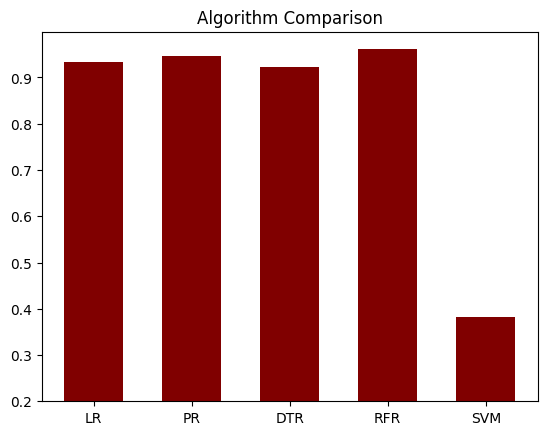

In [30]:
names = []
res = []

for name, model in models:
  if(name != 'PR'):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    res.append(r2_score(y_test, y_pred))
    names.append(name)

  else:
    x_poly = model.fit_transform(x_train)
    modelLR = LinearRegression()
    modelLR.fit(x_poly, y_train)
    y_pred = modelLR.predict(model.transform(x_test))
    res.append(r2_score(y_test, y_pred))
    names.append(name)

print(names)
print(res)

import matplotlib.pyplot as plt

plt.ylim(.200, .999)
plt.bar(names, res, color = 'maroon', width = 0.6)
plt.title("Algorithm Comparison")
plt.show()



